# Moulin water level with constant input - for different position on the ice sheet
This notebook simulates and plot results for Figure 3

It requires the python files FR_mainCode_plus which is a class. 
1. To run a simulation:
 
>results = calc_sim()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import seaborn as sns
#Hamemade package
import FR_mainCode_plus as frplus

In [33]:
#%%
profile = np.arange(1000,61000,1000)
radius_cylinder = [5,7.5,10,12.5,15]
#radius_losange = [1,2,5,10,19]
slope_H2 = [-0.02,
          -0.01,
          0,
          0.01,
          0.02]
slope_heq = [-0.06,
          -0.03,
          0,
          0.03,
          0.06]
slope_losange = [-0.06,
          -0.03,
          0,
          0.03,
          0.06]
#%%

profile = np.arange(1000,61000,1000)

## Simulate outputs
This calculates the head, subglacial channel cross-section area, and multiple other parameters contained in a class

In [6]:
#%%
profile = np.arange(1000,61000,1000)
radius_cylinder = [5,7.5,10,12.5,15]
#radius_losange = [1,2,5,10,19]
slope_H2 = [-0.02,
          -0.01,
          0,
          0.01,
          0.02]
slope_heq = [-0.06,
          -0.03,
          0,
          0.03,
          0.06]
slope_losange = [-0.06,
          -0.03,
          0,
          0.03,
          0.06]
#%%

profile = np.arange(1000,61000,1000)

#Calculate simulation results for cylinders
damping_cylinder = []
oscillation_cylinder = []
r_vector_cylinder = []
z_vector_cylinder = []
alpha_fit_cylinder = []
rmspe_damp_cylinder = []
rmspe_osc_cylinder = []
for r in radius_cylinder:
    col_damp = []
    col_oscillation = []
    col_alpha_fit = []
    for L in profile:
        resdic = frplus.calc_sim(r_fix=r,L=L,profile=True)
        col_damp.append(resdic['damping_fit'])
        col_oscillation.append(resdic['oscillation_fit'])
        col_alpha_fit.append(resdic['alpha_fit'])
        # fit estimation
        y_actual = resdic['hd'][resdic['td']<3*resdic['damping_fit']]
        y_predicted = resdic['hd_fit'][resdic['td']<3*resdic['damping_fit']]
        rmspe_damp = (np.sqrt(np.mean(np.square((y_actual - y_predicted) / y_actual)))) * 100
        y_actual = resdic['hd'][resdic['td']<3*resdic['oscillation_fit']]
        y_predicted = resdic['hd_fit'][resdic['td']<3*resdic['oscillation_fit']]
        rmspe_osc = (np.sqrt(np.mean(np.square((y_actual - y_predicted) / y_actual)))) * 100

    rmspe_damp_cylinder.append(rmspe_damp)
    rmspe_osc_cylinder.append(rmspe_osc)
    damping_cylinder.append(col_damp) 
    oscillation_cylinder.append(col_oscillation)
    r_vector_cylinder.append(resdic['r_vector'])
    z_vector_cylinder.append(resdic['z_vector'])
    alpha_fit_cylinder.append(col_alpha_fit)

#Calculate simulation results for cone with common radii at H/2
damping_H2 = []
oscillation_H2 = []
r_vector_H2 = []
z_vector_H2 = []
alpha_fit_H2 = []
rmspe_damp_H2 = []
rmspe_osc_H2 = []
for m in slope_H2:
    col_damp = []
    col_oscillation = []
    col_alpha_fit = []
    for L in profile:
        resdic = frplus.calc_sim(r_fix=10,m=m,L=L,profile=True,z_fix='H2')
        col_damp.append(resdic['damping_fit'])
        col_oscillation.append(resdic['oscillation_fit'])
        col_alpha_fit.append(resdic['alpha_fit'])
        # fit estimation
        y_actual = resdic['hd'][resdic['td']<3*resdic['damping_fit']]
        y_predicted = resdic['hd_fit'][resdic['td']<3*resdic['damping_fit']]
        rmspe_damp = (np.sqrt(np.mean(np.square((y_actual - y_predicted) / y_actual)))) * 100
        y_actual = resdic['hd'][resdic['td']<3*resdic['oscillation_fit']]
        y_predicted = resdic['hd_fit'][resdic['td']<3*resdic['oscillation_fit']]
        rmspe_osc = (np.sqrt(np.mean(np.square((y_actual - y_predicted) / y_actual)))) * 100

    rmspe_damp_H2.append(rmspe_damp)
    rmspe_osc_H2.append(rmspe_osc)
    damping_H2.append(col_damp) 
    oscillation_H2.append(col_oscillation)
    r_vector_H2.append(resdic['r_vector'])
    z_vector_H2.append(resdic['z_vector'])
    alpha_fit_H2.append(col_alpha_fit)

#Calculate simulation results for cone with common radii at heq
damping_heq = []
oscillation_heq = []
r_vector_heq = []
z_vector_heq = []
alpha_fit_heq = []
rmspe_damp_heq = []
rmspe_osc_heq = []
for m in slope_heq:
    col_damp = []
    col_oscillation = []
    col_alpha_fit = []
    for L in profile:
        resdic = frplus.calc_sim(r_fix=10,m=m,L=L,profile=True,z_fix='heq')
        col_damp.append(resdic['damping_fit'])
        col_oscillation.append(resdic['oscillation_fit'])
        col_alpha_fit.append(resdic['alpha_fit'])
        # fit estimation
        y_actual = resdic['hd'][resdic['td']<3*resdic['damping_fit']]
        y_predicted = resdic['hd_fit'][resdic['td']<3*resdic['damping_fit']]
        rmspe_damp = (np.sqrt(np.mean(np.square((y_actual - y_predicted) / y_actual)))) * 100
        y_actual = resdic['hd'][resdic['td']<3*resdic['oscillation_fit']]
        y_predicted = resdic['hd_fit'][resdic['td']<3*resdic['oscillation_fit']]
        rmspe_osc = (np.sqrt(np.mean(np.square((y_actual - y_predicted) / y_actual)))) * 100

    rmspe_damp_heq.append(rmspe_damp)
    rmspe_osc_heq.append(rmspe_osc)
    damping_heq.append(col_damp) 
    oscillation_heq.append(col_oscillation)
    r_vector_heq.append(resdic['r_vector'])
    z_vector_heq.append(resdic['z_vector'])
    alpha_fit_heq.append(col_alpha_fit)
    

#Calculate simulation results for diamond-hourglass shape with common radii at heq
damping_losange = []
oscillation_losange = []
r_vector_losange = []
z_vector_losange = []
alpha_fit_losange = []
rmspe_damp_losange = []
rmspe_osc_losange = []
for m in slope_losange:
    col_damp = []
    col_oscillation = []
    col_alpha_fit = []
    for L in profile:
        resdic = frplus.calc_sim(shape = 'nodes',#,dh_below = 300,
                                 r_heq = 10,
                                 profile = True,
                                 L=L,
                                 slope = True,
                                 m=m)
        #t = resdic['td'][resdic['td']<3*resdic['oscillation_fit']]
        y_actual = resdic['hd'][resdic['td']<3*resdic['oscillation_fit']]
        y_predicted = resdic['hd_fit'][resdic['td']<3*resdic['oscillation_fit']]
        rmspe = (np.sqrt(np.mean(np.square((y_actual - y_predicted) / y_actual)))) * 100
        col_damp.append(resdic['damping_fit'])
        col_oscillation.append(resdic['oscillation_fit'])
        col_alpha_fit.append(resdic['alpha_fit'])
        # fit estimation
        y_actual = resdic['hd'][resdic['td']<3*resdic['damping_fit']]
        y_predicted = resdic['hd_fit'][resdic['td']<3*resdic['damping_fit']]
        rmspe_damp = (np.sqrt(np.mean(np.square((y_actual - y_predicted) / y_actual)))) * 100
        y_actual = resdic['hd'][resdic['td']<3*resdic['oscillation_fit']]
        y_predicted = resdic['hd_fit'][resdic['td']<3*resdic['oscillation_fit']]
        rmspe_osc = (np.sqrt(np.mean(np.square((y_actual - y_predicted) / y_actual)))) * 100

    rmspe_damp_losange.append(rmspe_damp)
    rmspe_osc_losange.append(rmspe_osc)
    damping_losange.append(col_damp) 
    oscillation_losange.append(col_oscillation)
    r_vector_losange.append(resdic['r_vector'])
    z_vector_losange.append(resdic['z_vector'])
    alpha_fit_losange.append(col_alpha_fit)


## Plot simulations

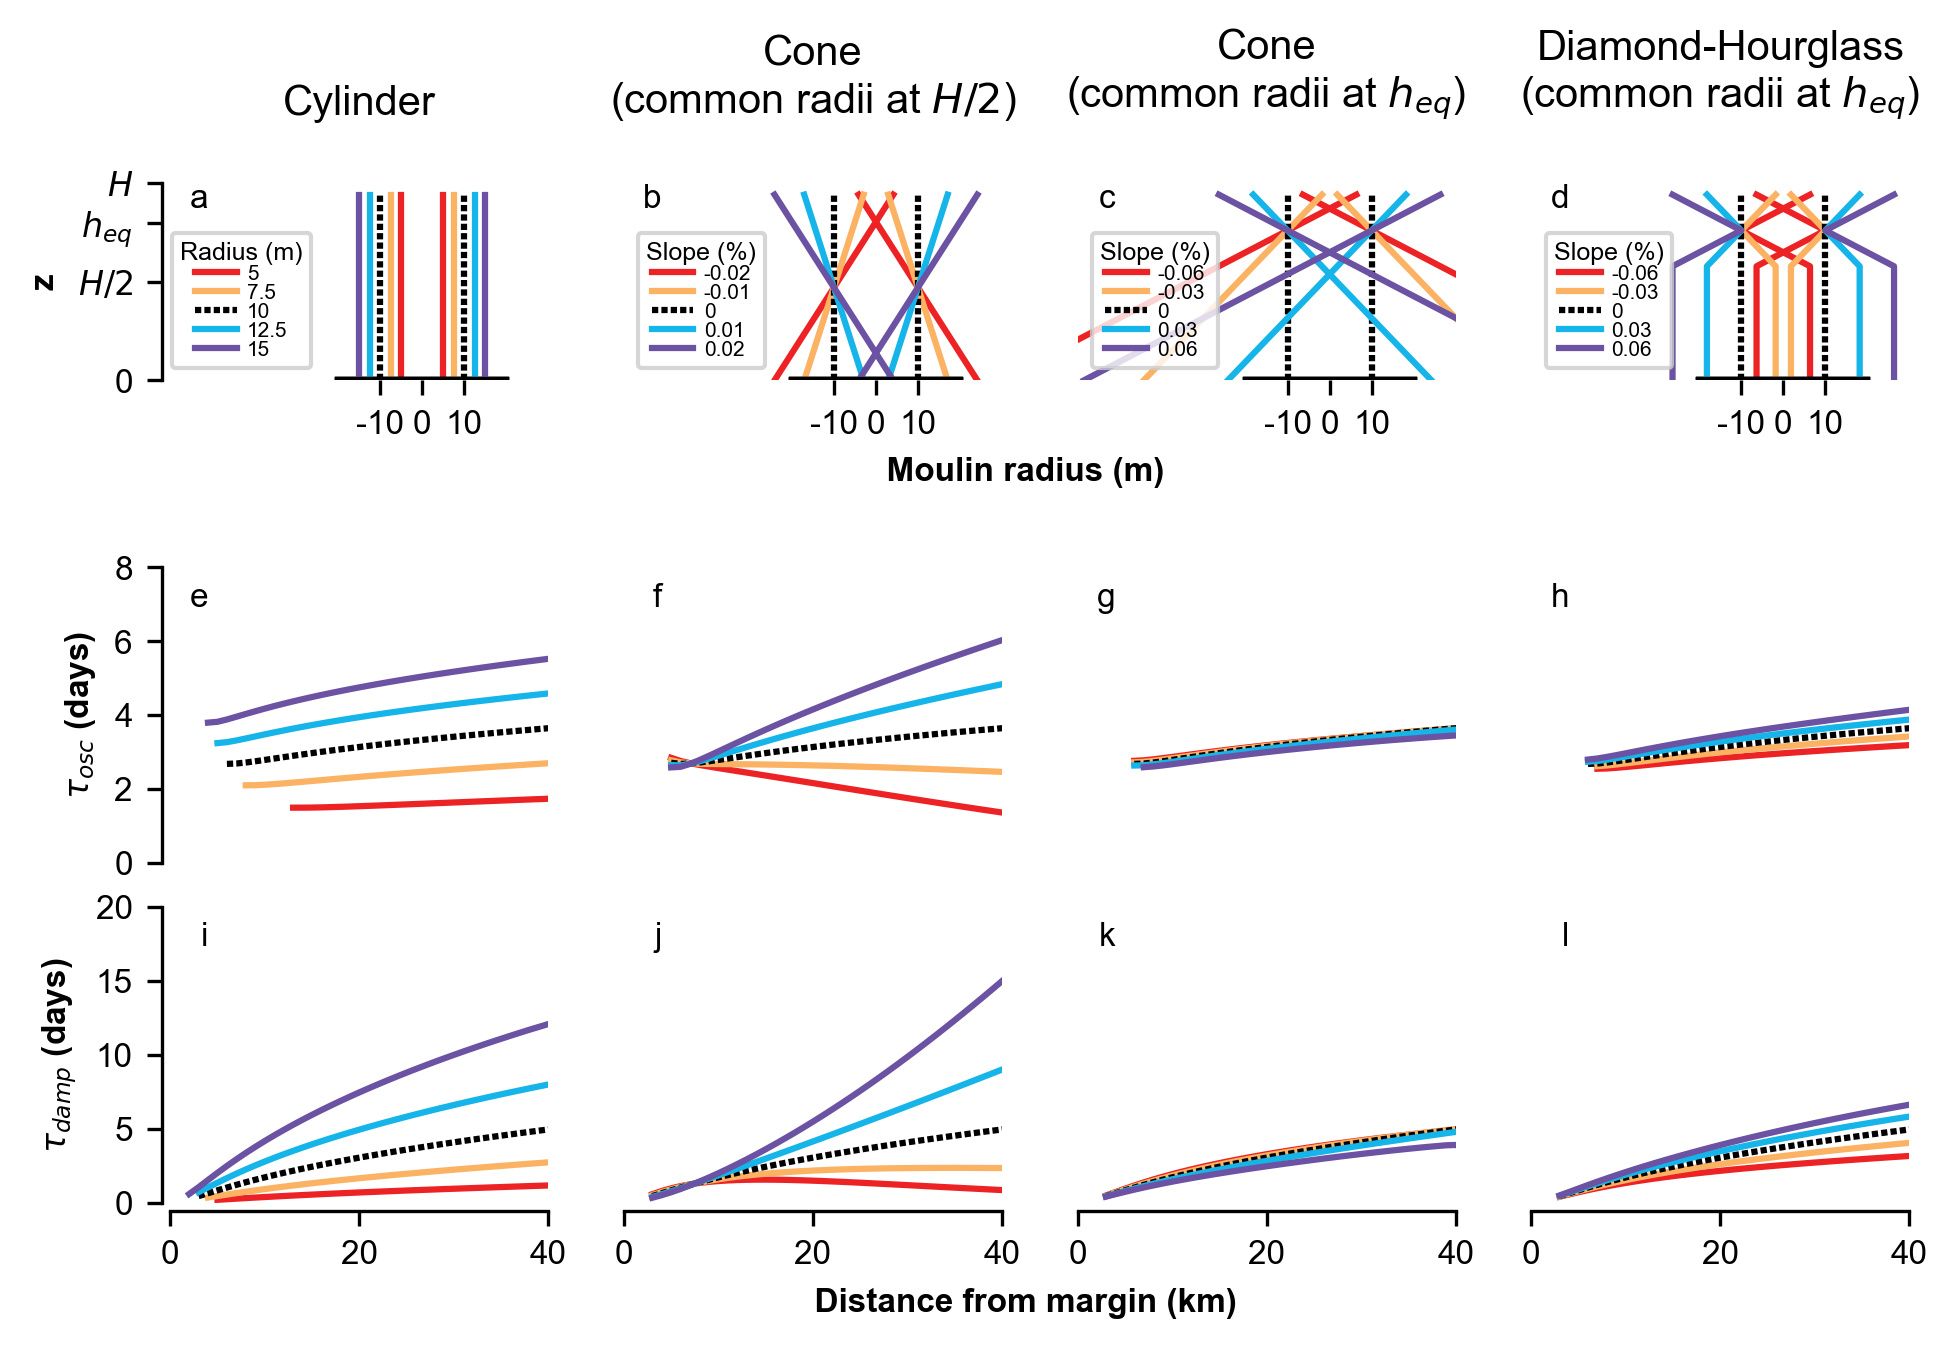

In [48]:
#%%    
def plot_moulin(ax,r_vector,z_vector):
    ax.plot(r_vector[i],z_vector[i],color=colors[i],lw=lw, linestyle = linestyles[i])
    ax.plot(-np.array(r_vector[i]),z_vector[i],color=colors[i],lw=lw, linestyle = linestyles[i])
    ax.set_xlim([-60,30]) 
    ax.set_ylim([0,1500])

#colors:
Red = '#ED2224'
Orange = '#FBB263'
#Green = '#A2D39E'
Blue = '#15B4E9'
Purple = '#6B52A2'

colors = (Red, Orange ,(0,0,0), Blue, Purple) #5colors
linestyles = ('solid','solid',(0, (1, 0.5)),'solid','solid')

fig, ax = plt.subplots(figsize=(7.48,4.5),dpi=300)
gs1 = gridspec.GridSpec(4,4,height_ratios=[2,1, 3,3])

lw = 1.5

ax0a = plt.subplot(gs1[0])
ax0b = plt.subplot(gs1[1])
ax0c = plt.subplot(gs1[2])
ax0d = plt.subplot(gs1[3])

ax1 = plt.subplot(gs1[8])
ax2 = plt.subplot(gs1[12])
ax3 = plt.subplot(gs1[9])
ax4 = plt.subplot(gs1[13])
ax5 = plt.subplot(gs1[10])
ax6 = plt.subplot(gs1[14])
ax7 = plt.subplot(gs1[11])
ax8 = plt.subplot(gs1[15])

#frameon=False
offset=(2,2)
sns.despine(ax=ax0a, offset=offset, bottom=True)
sns.despine(ax=ax0b, offset=offset, bottom=True, left=True)
sns.despine(ax=ax0c, offset=offset, bottom=True, left=True)
sns.despine(ax=ax0d, offset=offset, bottom=True, left=True)
sns.despine(ax=ax1, offset=offset,  bottom=True)
sns.despine(ax=ax2, offset=offset)
sns.despine(ax=ax3, offset=offset, bottom=True, left=True)
sns.despine(ax=ax4, offset=offset, left=True)
sns.despine(ax=ax5, offset=offset, bottom=True, left=True)
sns.despine(ax=ax6, offset=offset, left=True)
sns.despine(ax=ax7, offset=offset, bottom=True, left=True)
sns.despine(ax=ax8, offset=offset, left=True)

# ax0a.set_xticks([-20,0,20])
# ax0a.set_xticklabels(['-r', '0', 'r'])
# ax0b.set_xticks([-20,0,20])
# ax0b.set_xticklabels(['-r', '0', 'r'])
# ax0c.set_xticks([-20,0,20])
# ax0c.set_xticklabels(['-r', '0', 'r'])
# ax0d.set_xticks([-20,0,20])
# ax0d.set_xticklabels(['-r', '0', 'r'])
ax0a.set_xticks([-10,0,10])
ax0a.set_xticklabels([ '-10', '0', '10'])
ax0b.set_xticks([-10,0,10])
ax0b.set_xticklabels(['-10', '0', '10'])
ax0c.set_xticks([-10,0,10])
ax0c.set_xticklabels(['-10', '0', '10'])
ax0d.set_xticks([-10,0,10])
ax0d.set_xticklabels(['-10', '0', '10'])
ax1.set_xticks([])
ax3.set_xticks([])
ax5.set_xticks([])
ax7.set_xticks([])

xlim=[0,40]
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_xlim(xlim)
ax4.set_xlim(xlim)
ax5.set_xlim(xlim)
ax6.set_xlim(xlim)
ax7.set_xlim(xlim)
ax8.set_xlim(xlim)

ylim1=[0,8]
ylim2=[0,20]
ax1.set_ylim(ylim1)
ax2.set_ylim(ylim2)
ax3.set_ylim(ylim1)
ax4.set_ylim(ylim2)
ax5.set_ylim(ylim1)
ax6.set_ylim(ylim2)
ax7.set_ylim(ylim1)
ax8.set_ylim(ylim2)

ax1.set_yticks([0,2,4,6,8])
ax2.set_yticks([0,5,10,15,20]) 
ax0a.set_yticks([0,1500/2,1200,1500])
ax0a.set_yticklabels(['0','$H/2$','$h_{eq}$','$H$'])
ax0b.set_yticks([])
ax0c.set_yticks([])
ax0d.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])
ax5.set_yticks([])
ax6.set_yticks([])
ax7.set_yticks([])
ax8.set_yticks([])


ax0a.set_ylabel('z')
# ax0a.set_xlabel('                Moulin radius (m)', fontsize=6)
# ax0b.set_xlabel('                Moulin radius (m)', fontsize=6)
# ax0c.set_xlabel('                Moulin radius (m)', fontsize=6)
# ax0d.set_xlabel('                Moulin radius (m)', fontsize=6)
ax1.set_ylabel('$\\tau_{osc}$ (days)')
ax2.set_ylabel('$\\tau_{damp}$ (days)')
ax0b.set_xlabel('                                              Moulin radius (m)')  
ax4.set_xlabel('                                              Distance from margin (km)')  

elements_ax0a = [Line2D([0], [0],  color=colors[0], lw=lw, label=radius_cylinder[0]),
                 Line2D([0], [0],  color=colors[1], lw=lw, label=radius_cylinder[1]),
                 Line2D([0], [0],  color=colors[2], lw=lw, label=radius_cylinder[2], linestyle = linestyles[2]),
                 Line2D([0], [0],  color=colors[3], lw=lw, label=radius_cylinder[3]),
                 Line2D([0], [0],   color=colors[4], lw=lw, label=radius_cylinder[4])]

elements_ax0b = [Line2D([0], [0],  color=colors[0], lw=lw, label=slope_H2[0]),
                 Line2D([0], [0],  color=colors[1], lw=lw, label=slope_H2[1]),
                 Line2D([0], [0],  color=colors[2], lw=lw, label=slope_H2[2], linestyle = linestyles[2]),
                 Line2D([0], [0],  color=colors[3], lw=lw, label=slope_H2[3]),
                 Line2D([0], [0],   color=colors[4], lw=lw, label=slope_H2[4])]

elements_ax0c = [Line2D([0], [0],  color=colors[0], lw=lw, label=slope_heq[0]),
                 Line2D([0], [0],  color=colors[1], lw=lw, label=slope_heq[1]),
                 Line2D([0], [0],  color=colors[2], lw=lw, label=slope_heq[2], linestyle = linestyles[2]),
                 Line2D([0], [0],  color=colors[3], lw=lw, label=slope_heq[3]),
                 Line2D([0], [0],   color=colors[4], lw=lw, label=slope_heq[4])]

elements_ax0d = [Line2D([0], [0],  color=colors[0], lw=lw, label=slope_losange[0]),
                 Line2D([0], [0],  color=colors[1], lw=lw, label=slope_losange[1]),
                 Line2D([0], [0],  color=colors[2], lw=lw, label=slope_losange[2], linestyle = linestyles[2]),
                 Line2D([0], [0],  color=colors[3], lw=lw, label=slope_losange[3]),
                 Line2D([0], [0],   color=colors[4], lw=lw, label=slope_losange[4])]

ax0a.legend(handles=elements_ax0a, loc=1,  labelspacing=0, handletextpad=0.5,  
       prop={'size': 5}, title='Radius (m)',title_fontsize=6, bbox_to_anchor=(0.4, 0.8))
ax0b.legend(handles=elements_ax0b, loc=1,  labelspacing=0, handletextpad=0.5,  
       prop={'size': 5}, title='Slope (%)',title_fontsize=6, bbox_to_anchor=(0.4, 0.8))
ax0c.legend(handles=elements_ax0c, loc=1,  labelspacing=0, handletextpad=0.5,  
       prop={'size': 5}, title='Slope (%)',title_fontsize=6, bbox_to_anchor=(0.4, 0.8))
ax0d.legend(handles=elements_ax0d, loc=1,  labelspacing=0, handletextpad=0.5,  
       prop={'size': 5}, title='Slope (%)',title_fontsize=6, bbox_to_anchor=(0.4, 0.8))

pos2 = 0.95

ax0a.text(0.1, 1, 'a', ha='right', va='top', transform=ax0a.transAxes,fontsize=8, 
          bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax0b.text(0.1,1,'b', ha='right', va='top', transform=ax0b.transAxes,fontsize=8, 
          bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax0c.text(0.1, 1,'c', ha='right', va='top', transform=ax0c.transAxes,fontsize=8, 
          bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax0d.text(0.1, 1, 'd', ha='right', va='top', transform=ax0d.transAxes,fontsize=8, 
          bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax1.text(0.1, pos2,'e', ha='right', va='top', transform=ax1.transAxes,fontsize=8, 
          bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax3.text(0.1, pos2,'f', ha='right', va='top', transform=ax3.transAxes,fontsize=8, 
          bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax5.text(0.1, pos2, 'g', ha='right', va='top', transform=ax5.transAxes,fontsize=8, 
          bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax7.text(0.1, pos2,'h', ha='right', va='top', transform=ax7.transAxes,fontsize=8, 
          bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax2.text(0.1, pos2,'i', ha='right', va='top', transform=ax2.transAxes,fontsize=8, 
          bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax4.text(0.1, pos2,'j', ha='right', va='top', transform=ax4.transAxes,fontsize=8, 
          bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax6.text(0.1, pos2,'k', ha='right', va='top', transform=ax6.transAxes,fontsize=8, 
          bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
ax8.text(0.1, pos2,'l', ha='right', va='top', transform=ax8.transAxes,fontsize=8, 
          bbox=dict(facecolor='white', edgecolor='none', pad=1.0))


ax0a.set_title('Cylinder\n ', fontsize=10)
ax0b.set_title('Cone\n(common radii at $H/2$)\n ', fontsize=10)
ax0c.set_title('Cone\n(common radii at $h_{eq}$)\n ', fontsize=10)
ax0d.set_title('Diamond-Hourglass\n(common radii at $h_{eq}$)\n ', fontsize=10)


for i in np.arange(5): 

    #plot moulin shapes
    plot_moulin(ax0a,r_vector_cylinder,z_vector_cylinder)
    plot_moulin(ax0b,r_vector_H2,z_vector_H2)
    plot_moulin(ax0c,r_vector_heq,z_vector_heq)
    plot_moulin(ax0d,r_vector_losange,z_vector_losange)
    
    ax0a.plot([-20,20],[0,0],'-', linewidth=1.5, color='black')
    ax0b.plot([-20,20],[0,0],'-', linewidth=1.5, color='black')
    ax0c.plot([-20,20],[0,0],'-', linewidth=1.5, color='black')
    ax0d.plot([-20,20],[0,0],'-', linewidth=1.5, color='black')
    
    #remove simulations with no results
    cond_cylinder = np.array(alpha_fit_cylinder[i]) != 9999
    cond_H2 = np.array(alpha_fit_H2[i]) != 9999
    cond_heq = np.array(alpha_fit_heq[i]) != 9999
    cond_losange = np.array(alpha_fit_losange[i]) != 9999
    
    #find beginning of simulation with full oscillations
    dist_cylinder = profile[cond_cylinder][np.array(oscillation_cylinder[i])[cond_cylinder]==min(np.array(oscillation_cylinder[i])[cond_cylinder])]
    dist_H2 = profile[cond_H2][np.array(oscillation_H2[4])[cond_H2]==min(np.array(oscillation_H2[4])[cond_H2])]
    dist_heq = profile[cond_heq][np.array(oscillation_heq[i])[cond_heq]==min(np.array(oscillation_heq[i])[cond_heq])]
    dist_losange = profile[cond_losange][np.array(oscillation_losange[i])[cond_losange]==min(np.array(oscillation_losange[i])[cond_losange])]

    pre_cylinder = profile[cond_cylinder]<dist_cylinder
    post_cylinder = profile[cond_cylinder]>=dist_cylinder
    
    pre_H2 = profile[cond_H2]<dist_H2
    post_H2 = profile[cond_H2]>=dist_H2
    
    pre_heq = profile[cond_heq]<dist_heq
    post_heq = profile[cond_heq]>=dist_heq
    
    pre_losange = profile[cond_losange]<dist_losange
    post_losange = profile[cond_losange]>=dist_losange
    
    '''Change radius with fixed slope'''
    ax1.plot(profile[cond_cylinder][post_cylinder]/1000,np.array(oscillation_cylinder[i])[cond_cylinder][post_cylinder],color=colors[i], lw=lw, linestyle=linestyles[i])
    #ax1.plot(profile[cond_cylinder][pre_cylinder]/1000,np.array(oscillation_cylinder[i])[cond_cylinder][pre_cylinder],color=colors[i], lw=lw, linestyle='--')
    ax2.plot(profile[cond_cylinder]/1000,np.array(damping_cylinder[i])[cond_cylinder],color=colors[i], lw=lw, linestyle=linestyles[i])
    
    '''Change slope with h_middle fixed'''
    ax3.plot(profile[cond_H2][post_H2]/1000,np.array(oscillation_H2[i])[cond_H2][post_H2],color=colors[i], lw=lw, linestyle=linestyles[i])
    #ax3.plot(profile[cond_H2][pre_H2]/1000,np.array(oscillation_H2[i])[cond_H2][pre_H2],color=colors[i], lw=lw, linestyle='--')
    ax4.plot(profile[cond_H2]/1000,np.array(damping_H2[i])[cond_H2],color=colors[i], lw=lw, linestyle=linestyles[i])
    
    '''Change slope with h_eq fixed'''
    ax5.plot(profile[cond_heq][post_heq]/1000,np.array(oscillation_heq[i])[cond_heq][post_heq],color=colors[i], lw=lw, linestyle=linestyles[i])
    #ax5.plot(profile[cond_heq][pre_heq]/1000,np.array(oscillation_heq[i])[cond_heq][pre_heq],color=colors[i], lw=lw, linestyle='--')
    ax6.plot(profile[cond_heq]/1000,np.array(damping_heq[i])[cond_heq],color=colors[i], lw=lw, linestyle=linestyles[i])

    '''Change radius with h_eq fixed for losange'''
    ax7.plot(profile[cond_losange][post_losange]/1000,np.array(oscillation_losange[i])[cond_losange][post_losange],color=colors[i], lw=lw, linestyle=linestyles[i])
    #ax7.plot(profile[cond_losange][pre_losange]/1000,np.array(oscillation_losange[i])[cond_losange][pre_losange],color=colors[i], lw=lw, linestyle='--')
    ax8.plot(profile[cond_losange]/1000,np.array(damping_losange[i])[cond_losange],color=colors[i], lw=lw, linestyle=linestyles[i])


#plt.subplots_adjust(left=0.08, right=0.99, top=0.96, bottom=0.14)


plt.savefig('Figures/timescales_across_icesheet.pdf')
#plt.savefig('Figures/timescales_across_icesheet.png')
